In [3]:
from Data_Core.experiment import *
%matplotlib notebook

In [4]:
from shutil import copy

folder = r'data/Mapa_Moscovite_final/'
folders = [folder+f+'/' for f in os.listdir(folder) if os.path.isdir(folder+f)]
folder_copy = r'data/Map/'

for i in range(0,len(folders)):
    files = [folders[i]+f for f in os.listdir(folders[i]) if '1703275U8' not in f and '0000' not in f]
    
    if not os.path.exists(folder_copy+folders[i]):
        os.makedirs(folder_copy+folders[i])
    for j in range(0,len(files)):
        copy(files[j],folder_copy+folders[i])

In [5]:
folder = r"data/Map/data/Mapa_Moscovite_final/"
folders = [folder+f+'/' for f in os.listdir(folder) if os.path.isdir(folder+f)]
current_experiment = experiment(folders[0])
list_of_experiments = [experiment(f) for f in folders]
current_experiment.concatenate(list_of_experiments)

In [6]:
for i in range(len(current_experiment.list_of_signals)):
    print('Removing baseline ' + str(i) + ' of ' +str(len(current_experiment.list_of_signals)),end='\r')
    current_experiment.list_of_signals[i].remove_baseline()

In [7]:
current_experiment.list_of_signals[0].wavelengths

[array([177.84457397, 177.88824463, 177.93188477, ..., 254.63226318,
        254.66304016, 254.6937561 ]),
 array([250.49510193, 250.53405762, 250.57299805, ..., 315.57122803,
        315.59515381, 315.61911011]),
 array([309.95288086, 309.98712158, 310.02139282, ..., 363.8739624 ,
        363.89172363, 363.90945435]),
 array([400.41888428, 400.47543335, 400.5319519 , ..., 493.57824707,
        493.61175537, 493.64517212]),
 array([493.21081543, 493.28952026, 493.3682251 , ..., 625.68725586,
        625.73657227, 625.78582764]),
 array([619.97229004, 620.04064941, 620.10894775, ..., 727.26196289,
        727.29724121, 727.33251953]),
 array([725.36218262, 725.48138428, 725.6005249 , ..., 926.47070312,
        926.5458374 , 926.62097168])]

In [8]:
x_values,y_values,map_values = current_experiment.make_map(0,specific_wavelength = 812.5,ratio_of_maximum = 0.5, Plotline=True)
x_values,y_values,map_values1 = current_experiment.make_map(0,specific_wavelength = 670.5,ratio_of_maximum = 0.5, Plotline=True)

<IPython.core.display.Javascript object>

C:\Users\nunoa\Anaconda2\envs\py36\lib\site-packages\scipy\interpolate\_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=3,3 nx,ny=30,29 m=625 fp=677.020598 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [9]:
subplots()
f = interp2d(x_values,y_values,map_values,kind='linear')
f1 = interp2d(x_values,y_values,map_values1,kind='linear')

xnew=np.arange(min(x_values),max(x_values),.5)
ynew=np.arange(min(y_values),max(y_values),.5)

subplot(121)
title("812 nm")
imshow(f(xnew,ynew), cmap = 'plasma', interpolation='bicubic')
subplot(122)
title('670 nm')
imshow(f1(xnew,ynew), cmap = 'plasma', interpolation='bicubic')

<IPython.core.display.Javascript object>

C:\Users\nunoa\Anaconda2\envs\py36\lib\site-packages\scipy\interpolate\_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=27,28 m=625 fp=1831.201103 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))


In [10]:
subplots()
plot(map_values)

<IPython.core.display.Javascript object>

In [11]:
subplots()
i0 = 371*2-1
i1 = 371*2
i2 = 371*2+1
plot(np.array(current_experiment.list_of_signals[i0].wavelengths).flatten(),
     np.array(current_experiment.list_of_signals[i0].spectrum).flatten(),'-')

plot(np.array(current_experiment.list_of_signals[i1].wavelengths).flatten(),
     np.array(current_experiment.list_of_signals[i1].spectrum).flatten(),'-')

plot(np.array(current_experiment.list_of_signals[i2].wavelengths).flatten(),
     np.array(current_experiment.list_of_signals[i2].spectrum).flatten(),'-')

<IPython.core.display.Javascript object>

In [12]:
current_experiment.list_of_signals

[Signal for shot 0001
 at folder 
 data/Map/data/Mapa_Moscovite_final/spot1/
  with 7 spectrometers,
 Signal for shot 0002
 at folder 
 data/Map/data/Mapa_Moscovite_final/spot1/
  with 7 spectrometers,
 Signal for shot 0001
 at folder 
 data/Map/data/Mapa_Moscovite_final/spot1/
  with 7 spectrometers,
 Signal for shot 0002
 at folder 
 data/Map/data/Mapa_Moscovite_final/spot1/
  with 7 spectrometers,
 Signal for shot 0001
 at folder 
 data/Map/data/Mapa_Moscovite_final/spot10/
  with 7 spectrometers,
 Signal for shot 0002
 at folder 
 data/Map/data/Mapa_Moscovite_final/spot10/
  with 7 spectrometers,
 Signal for shot 0001
 at folder 
 data/Map/data/Mapa_Moscovite_final/spot100/
  with 7 spectrometers,
 Signal for shot 0002
 at folder 
 data/Map/data/Mapa_Moscovite_final/spot100/
  with 7 spectrometers,
 Signal for shot 0001
 at folder 
 data/Map/data/Mapa_Moscovite_final/spot101/
  with 7 spectrometers,
 Signal for shot 0002
 at folder 
 data/Map/data/Mapa_Moscovite_final/spot101/
  wi

In [13]:
folder = r"data/Map/data/Mapa_Moscovite_final/"
folders = [folder+f+'/' for f in os.listdir(folder) if os.path.isdir(folder+f)]
current_experiment1 = experiment(folders[0])
list_of_experiments = [experiment(f) for f in folders]
current_experiment1.concatenate(list_of_experiments)

In [14]:
subplots()
i0 = 371*2-1
i1 = 371*2
i2 = 371*2+1
plot(np.array(current_experiment1.list_of_signals[i0].wavelengths).flatten(),
     np.array(current_experiment1.list_of_signals[i0].spectrum).flatten(),'-',label=str(i0))

plot(np.array(current_experiment1.list_of_signals[i1].wavelengths).flatten(),
     np.array(current_experiment1.list_of_signals[i1].spectrum).flatten(),'-',label=str(i1))

plot(np.array(current_experiment1.list_of_signals[i2].wavelengths).flatten(),
     np.array(current_experiment1.list_of_signals[i2].spectrum).flatten(),'-',label=str(i2))

legend()

<IPython.core.display.Javascript object>

In [15]:
for i in range(len(current_experiment1.list_of_signals)):
    print('Removing baseline ' + str(i) + ' of ' +str(len(current_experiment1.list_of_signals)),end='\r')
    current_experiment1.list_of_signals[i].remove_baseline()
    current_experiment1.list_of_signals[i].normalize()

In [16]:
x_values,y_values,map_values = current_experiment1.make_map(0,specific_wavelength = 812.5,ratio_of_maximum = 0.5, Plotline=True)
x_values,y_values,map_values1 = current_experiment1.make_map(0,specific_wavelength = 670.5,ratio_of_maximum = 0.5, Plotline=True)

<IPython.core.display.Javascript object>

C:\Users\nunoa\Anaconda2\envs\py36\lib\site-packages\scipy\interpolate\_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=3,3 nx,ny=30,29 m=625 fp=0.000000 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [17]:
subplots()
f = interp2d(x_values,y_values,map_values,kind='linear')
f1 = interp2d(x_values,y_values,map_values1,kind='linear')

xnew=np.arange(min(x_values),max(x_values),.5)
ynew=np.arange(min(y_values),max(y_values),.5)

subplot(121)
title("812 nm")
imshow(f(xnew,ynew), cmap = 'plasma', interpolation='bicubic')
subplot(122)
title('670 nm')
imshow(f1(xnew,ynew), cmap = 'plasma', interpolation='bicubic')

<IPython.core.display.Javascript object>

C:\Users\nunoa\Anaconda2\envs\py36\lib\site-packages\scipy\interpolate\_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=28,27 m=625 fp=0.000000 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))


In [18]:
xx, yy = np.meshgrid(x_values,y_values)

In [19]:
subplots()
plot(xx,yy,'o', ms=1, color='w',alpha=0.1)
title("812 nm")
imshow(f(xnew,ynew), extent=[min(x_values),max(x_values),min(y_values),max(y_values)], cmap = 'plasma', interpolation='bicubic')

<IPython.core.display.Javascript object>

In [20]:
print([(2**i+1) for i in range(0,5)])

[2, 3, 5, 9, 17]


In [21]:
np.sqrt(len(x_values))
x_l

NameError: name 'x_l' is not defined

In [22]:
x_l = np.unique(x_values)
y_l = np.unique(y_values)
list_x_reduced=[]
list_y_reduced=[]
for i in [4,7,13,25]:
    xs=[]
    ys=[]
    print(i,(len(x_l)-1)/(i-1))
    for j in range(0,len(x_l),(len(x_l)-1)//(i-1)):
        xs.append(x_l[j])
        ys.append(y_l[j])
    list_x_reduced.append(np.array(xs))
    list_y_reduced.append(np.array(ys))
list_x_reduced=np.array(list_x_reduced)
list_y_reduced = np.array(list_y_reduced)
print(list_x_reduced)

4 8.0
7 4.0
13 2.0
25 1.0
[array([ 0.,  4.,  8., 12.]) array([ 0.,  2.,  4.,  6.,  8., 10., 12.])
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.])
 array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,
        5.5,  6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. , 10.5,
       11. , 11.5, 12. ])]


C:\Users\nunoa\Anaconda2\envs\py36\lib\site-packages\ipykernel_launcher.py:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  
C:\Users\nunoa\Anaconda2\envs\py36\lib\site-packages\ipykernel_launcher.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  from ipykernel import kernelapp as app


In [23]:
i = 0
new_x = list_x_reduced[i]
new_y = list_y_reduced[i]
new_xx, new_yy = np.meshgrid(new_x,new_y)
old_xx, old_yy = np.meshgrid(x_values, y_values)
new_mesh = np.stack((new_xx,new_yy),axis=-1)
old_mesh = np.stack((old_xx, old_yy),axis=-1)

In [24]:
new_xx.reshape(new_xx.shape[0],new_xx.shape[1],1)


array([[[ 0.],
        [ 4.],
        [ 8.],
        [12.]],

       [[ 0.],
        [ 4.],
        [ 8.],
        [12.]],

       [[ 0.],
        [ 4.],
        [ 8.],
        [12.]],

       [[ 0.],
        [ 4.],
        [ 8.],
        [12.]]])

8


<IPython.core.display.Javascript object>


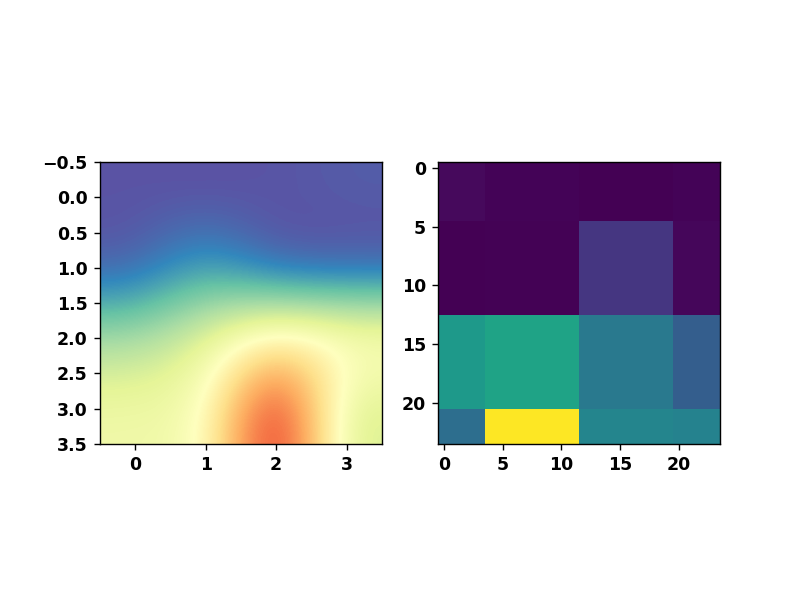

4


<IPython.core.display.Javascript object>


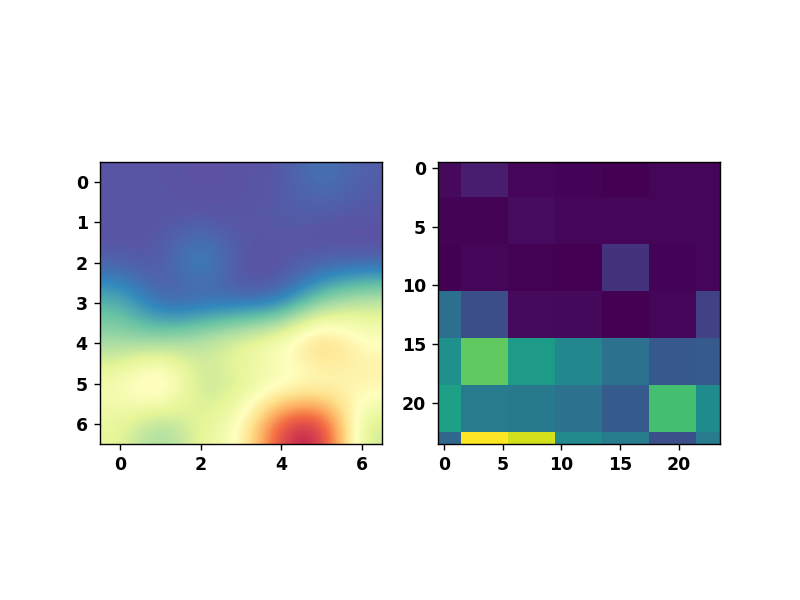

2


<IPython.core.display.Javascript object>


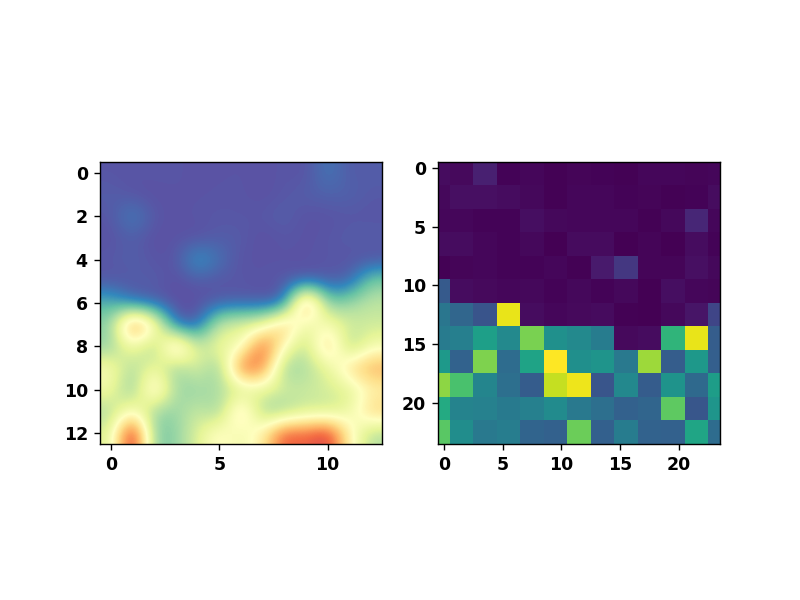

1


<IPython.core.display.Javascript object>


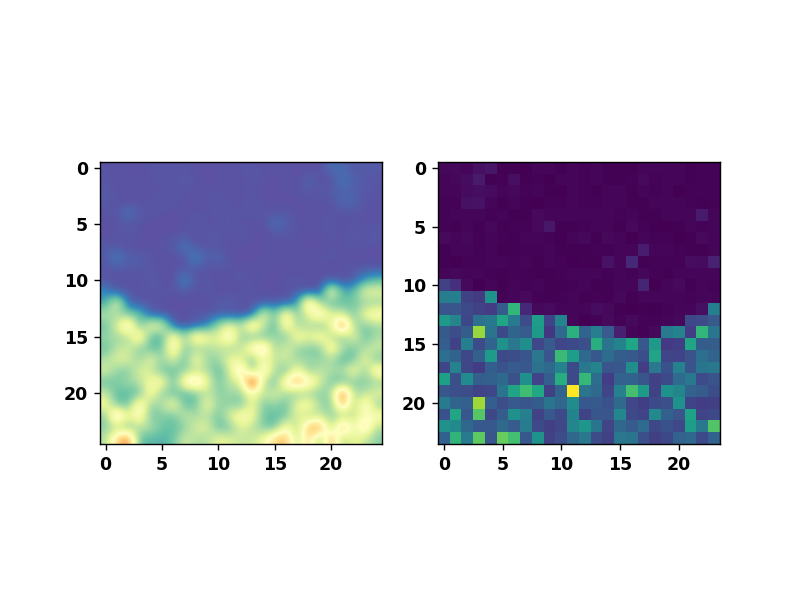

<IPython.core.display.Javascript object>


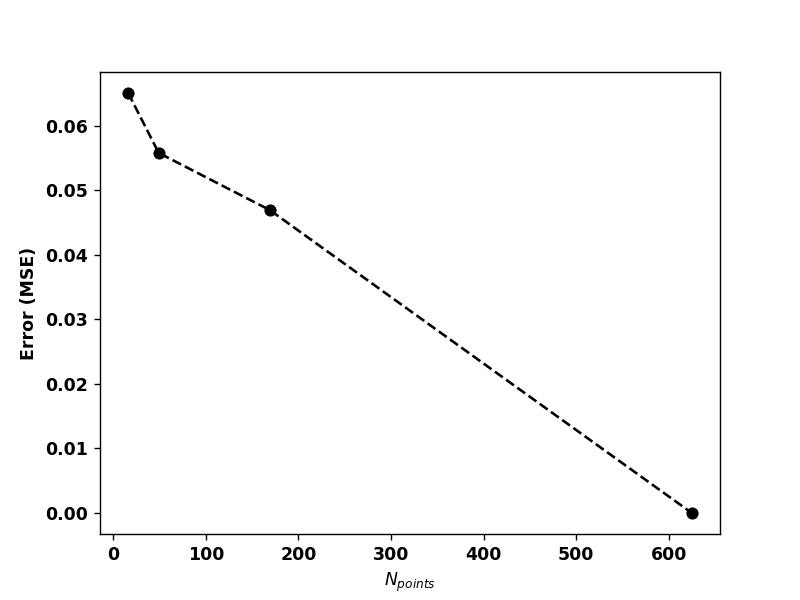

Text(0, 0.5, 'Error (MSE)')

In [25]:
data = []
n_points = [4,7,13,25] # [4,7,13,25]
for l in n_points:
    new_x_values=[]
    new_y_values=[]
    reduced_map_values=[]
    
    step = (len(x_l)-1)//(l-1)
    print(step)
    for i in range(0,len(x_l),step):
        for j in range(0,len(y_l),step):
            new_x_values.append(x_values[i*len(y_l)+j])
            new_y_values.append(y_values[i*len(y_l)+j])
            reduced_map_values.append(map_values[i*len(y_l)+j])
            
    new_x_l = np.unique(new_x_values)
    new_y_l = np.unique(new_y_values)
    
    new_map_values = np.zeros((l,l))
    x_coordinates = np.zeros((l,l))
    y_coordinates = np.zeros((l,l))
    
    for i in range(0,l):
        for j in range(0,l):
            x_coordinates[i,j] = new_x_values[i*len(new_y_l)+j]
            y_coordinates[i,j] = new_y_values[i*len(new_y_l)+j]
            new_map_values[i,j]= reduced_map_values[i*len(new_y_l)+j]
            
    subplots()
    subplot(121)
    imshow(new_map_values, interpolation='bicubic',cmap='Spectral_r')
    f = NearestNDInterpolator(list(zip(new_x_values, new_y_values)),new_map_values.flatten())
    #f1 = interp2d(new_x_values,new_y_values,new_map_values,kind='linear')
    subplot(122)
    x_nn = np.arange(0,12,0.5)
    y_nn = np.arange(0,12,0.5)
    X, Y = np.meshgrid(x_nn, -y_nn) 
    #imshow(np.transpose(f1(x_values,y_values)))
    imshow(np.transpose(f(X,Y)))
    x_nn = np.arange(0,12,0.5)
    y_nn = np.arange(0,12,0.5)
    data.append(np.transpose(f(X,Y)))
    

data = np.array(data)
errors = [np.sum(np.abs(data[i] - data[-1])) for i in range(0,len(data))]
#errors = np.sqrt([np.linalg.norm(data[i] - data[-1]) for i in range(0,len(data))])
subplots()
plot(np.array(n_points)**2, errors,'o',ls='--',color='k')
xlabel(r'$N_{points}$')
ylabel('Error (MSE)')

<IPython.core.display.Javascript object>


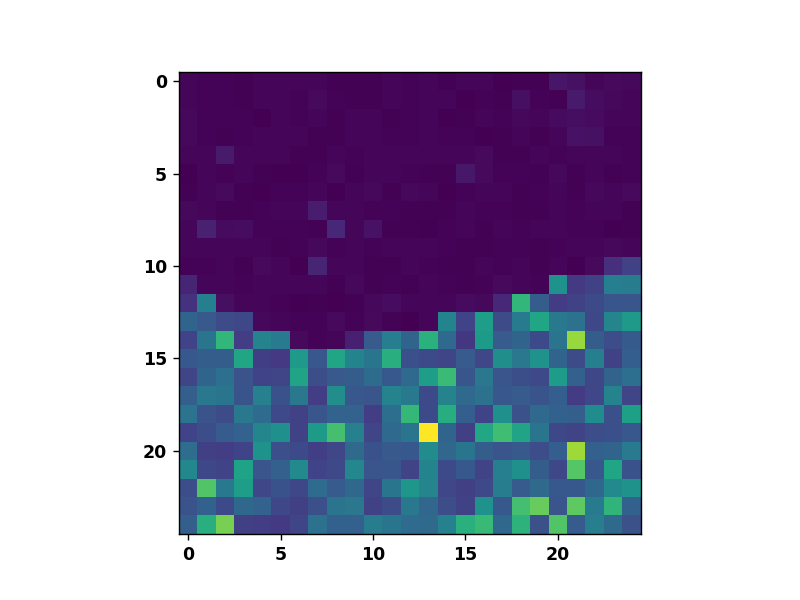

In [26]:
subplots()
imshow(np.array(map_values).reshape((25,25)))

In [27]:
from adaptative_mesh_alg1 import *

In [ ]:
#converter para 240*240
path='rock1.png'
rock_image=image(path)
my_mesh = Mesh(rock_image)

#rock_image.ROI_data_gray = rank.equalize(rock_image.ROI_data_gray, selem=selem)
subplots()
import skimage
from skimage.transform import rescale, resize, downscale_local_mean
rescale = resize(np.transpose(rock_image.ROI_data_gray), (240,240,3))
imshow(rescale)
skimage.io.imsave("rock2.png", rescale)

<IPython.core.display.Javascript object>


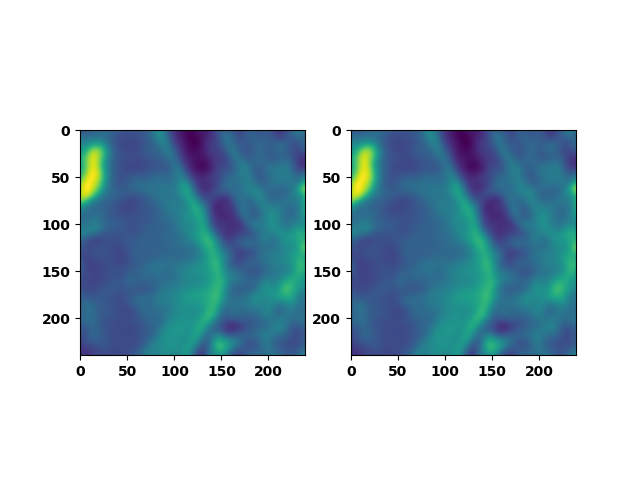

In [154]:
from skimage.filters import rank, gaussian
from skimage.morphology import disk

path='rock2.png'
rock_image=image(path)
my_mesh = Mesh(rock_image)

subplots()
selem = disk(10)
rock_image.ROI_data_gray = filters.gaussian(rock_image.ROI_data_gray, sigma=5)

subplot(121)
imshow(rock_image.ROI_data_gray)
subplot(122)
rock_image.ROI_data_gray #= rank.equalize(rock_image.ROI_data_gray, selem=selem)

rock_image.ROI_data_gray = resize(rock_image.ROI_data_gray, (240,240))

imshow(rock_image.ROI_data_gray )
#imshow(rank.equalize(rock_image.ROI_data_gray, selem=selem))

<IPython.core.display.Javascript object>


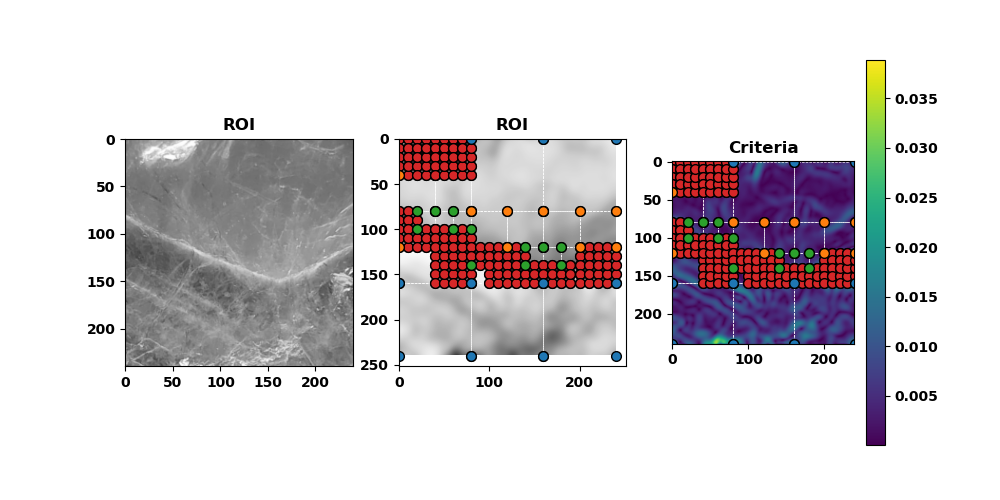

C:\Users\nunoa\Anaconda2\envs\py36\lib\site-packages\scipy\interpolate\_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=18,14 m=182 fp=0.009207 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))


In [224]:
#path='rock.png'
#rock_image=image(path)
my_mesh = Mesh(rock_image)

subplots(figsize=[10,5])

subplot(131)
rock_image.plot_ROI()

subplot(132)
rock_image.plot_ROI(gray=True)
threshold = 0.007 #0.75#0.05

if True:
    my_mesh.adaptative_mesh(threshold, max_num_divisions=2)
    coordinate = my_mesh.plot()

    subplot(133)
    coordinate = my_mesh.plot()
    rock_image.plot_criteria()

    x_values0, y_values0, map_values0 = my_mesh.get_coordinates_and_values(np.transpose(rock_image.ROI_data_gray))

    from scipy.interpolate import *

    f = interp2d(x_values0,y_values0,map_values0)
    #subplots()
    x_new = np.arange(0,200)
    y_new = np.arange(0,200)
    #imshow(f(x_new, y_new), interpolation='bicubic')

In [225]:
x_values1 = np.array(x_values0)/(rock_image.x_max//24)/2
y_values1 = np.array(y_values0)/(rock_image.y_max//24)/2-12

In [232]:
unique_x = np.unique(x_values1)
unique_y = np.unique(y_values1)

new_x_values=[]
new_y_values=[]
new_map_values1=[]

xy_values = np.stack([x_values,y_values],axis=1)
xy_values1 = np.stack([x_values1,y_values1],axis=1)

map_values_t = np.transpose(np.array(map_values).reshape(25,25)).flatten()

for i in range(0,len(unique_x)):
    for j in range(0,len(unique_y)):
        current_x = unique_x[i] 
        current_y = unique_y[j]
        #new mesh has (current_x, current_y)
        temp1 = (xy_values1 == [current_x,current_y])[:,0]*(xy_values1 == [current_x,current_y])[:,1]
        indexes1 = np.where(temp1 == True)[0]
        if indexes1.shape!=(0,):
            
            #which original mesh point correspond to (current_x, current_y)
            temp = (xy_values == [current_x,current_y])[:,0]*(xy_values == [current_x,current_y])[:,1]
            indexes = np.where(temp == True)[0]
            
            new_x_values.append(current_x)
            new_y_values.append(current_y)
            print(current_x, current_y, indexes[0])
            
            new_map_values1.append(map_values_t[indexes[0]])

f = NearestNDInterpolator(list(zip(new_x_values, new_y_values)),new_map_values1)

0.0 -12.0 0
0.0 -11.5 1
0.0 -11.0 2
0.0 -10.5 3
0.0 -10.0 4
0.0 -8.0 8
0.0 -7.5 9
0.0 -7.0 10
0.0 -6.5 11
0.0 -6.0 12
0.0 -4.0 16
0.0 0.0 24
0.5 -12.0 25
0.5 -11.5 26
0.5 -11.0 27
0.5 -10.5 28
0.5 -10.0 29
0.5 -8.0 33
0.5 -7.5 34
0.5 -7.0 35
0.5 -6.5 36
0.5 -6.0 37
1.0 -12.0 50
1.0 -11.5 51
1.0 -11.0 52
1.0 -10.5 53
1.0 -10.0 54
1.0 -8.0 58
1.0 -7.5 59
1.0 -7.0 60
1.0 -6.5 61
1.0 -6.0 62
1.5 -12.0 75
1.5 -11.5 76
1.5 -11.0 77
1.5 -10.5 78
1.5 -10.0 79
1.5 -7.0 85
1.5 -6.5 86
1.5 -6.0 87
2.0 -12.0 100
2.0 -11.5 101
2.0 -11.0 102
2.0 -10.5 103
2.0 -10.0 104
2.0 -8.0 108
2.0 -7.0 110
2.0 -6.5 111
2.0 -6.0 112
2.0 -5.5 113
2.0 -5.0 114
2.0 -4.5 115
2.0 -4.0 116
2.5 -12.0 125
2.5 -11.5 126
2.5 -11.0 127
2.5 -10.5 128
2.5 -10.0 129
2.5 -7.0 135
2.5 -6.5 136
2.5 -6.0 137
2.5 -5.5 138
2.5 -5.0 139
2.5 -4.5 140
2.5 -4.0 141
3.0 -12.0 150
3.0 -11.5 151
3.0 -11.0 152
3.0 -10.5 153
3.0 -10.0 154
3.0 -8.0 158
3.0 -7.0 160
3.0 -6.5 161
3.0 -6.0 162
3.0 -5.5 163
3.0 -5.0 164
3.0 -4.5 165
3.0 -4.0 166

In [233]:
x_values1

array([ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
        0. ,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,
        1. ,  1. ,  1. ,  1. ,  1. ,  1. ,  1. ,  1. ,  1. ,  1. ,  1.5,
        1.5,  1.5,  1.5,  1.5,  1.5,  1.5,  1.5,  2. ,  2. ,  2. ,  2. ,
        2. ,  2. ,  2. ,  2. ,  2. ,  2. ,  2. ,  2. ,  2. ,  2.5,  2.5,
        2.5,  2.5,  2.5,  2.5,  2.5,  2.5,  2.5,  2.5,  2.5,  2.5,  3. ,
        3. ,  3. ,  3. ,  3. ,  3. ,  3. ,  3. ,  3. ,  3. ,  3. ,  3. ,
        3. ,  3.5,  3.5,  3.5,  3.5,  3.5,  3.5,  3.5,  3.5,  3.5,  3.5,
        3.5,  3.5,  4. ,  4. ,  4. ,  4. ,  4. ,  4. ,  4. ,  4. ,  4. ,
        4. ,  4. ,  4. ,  4. ,  4. ,  4.5,  4.5,  4.5,  5. ,  5. ,  5. ,
        5. ,  5. ,  5.5,  5.5,  5.5,  5.5,  5.5,  6. ,  6. ,  6. ,  6. ,
        6. ,  6. ,  6.5,  6.5,  6.5,  6.5,  6.5,  7. ,  7. ,  7. ,  7. ,
        7. ,  7.5,  7.5,  7.5,  8. ,  8. ,  8. ,  8. ,  8. ,  8. ,  8. ,
        8.5,  8.5,  8.5,  9. ,  9. ,  9. ,  9. ,  9

<IPython.core.display.Javascript object>


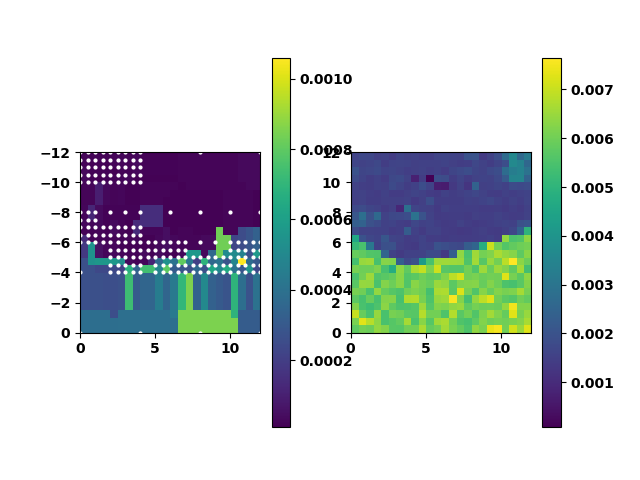

<IPython.core.display.Javascript object>


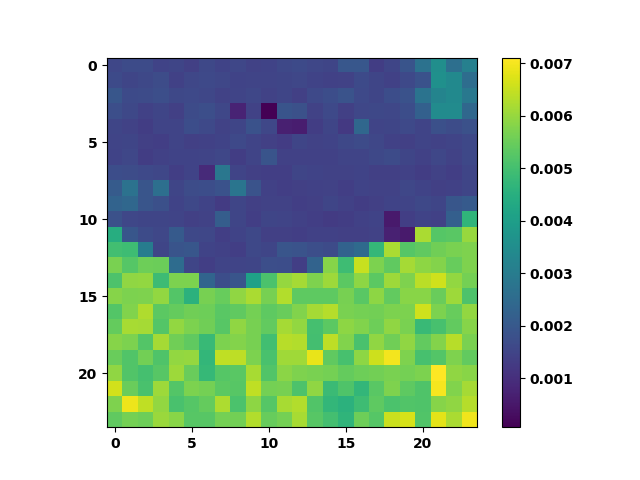

2.0132826347336663


In [237]:
subplots()
x_nn = x_values
y_nn = np.abs(y_values)
x_nn = np.arange(0,12,0.5)
y_nn = np.arange(-12,0,0.5)
X, Y = np.meshgrid(x_nn, y_nn) 
subplot(121)
prediction = f(X,Y)
imshow(prediction,extent=[0,12,0,-12])
coordinates = np.stack([new_x_values,new_y_values],axis=1)
plot(coordinates[:,0],coordinates[:,1],'o', ms=2.,color='w')
colorbar()
subplot(122)
dd = f1(x_nn,y_nn)
imshow(np.transpose(dd),extent=[0,12,0,12])
colorbar()
subplots()
imshow(np.abs(prediction - np.transpose(dd)))
colorbar()

error = np.sum( np.abs(prediction - np.transpose(dd)))
print(error)

In [ ]:
print(errors,np.array(n_points)**2)

In [ ]:
len(new_y_values)

In [ ]:
dd.shape

In [ ]:
len(reduced_map_values)


In [ ]:
np.unique((np.stack([x_values1,y_values1],axis=1)).astype(int),axis=0).shape

In [ ]:
(xy_values == [current_x,current_y])[:,0]

In [ ]:
subplots()
plot(x_values1)
plot(y_values1)